# Linear Models

## Logistic Regression

Logistic Regression, also called maximum-entropy classification (MaxEnt) or the log-linear classifier, is a linear model for **classification** which uses a logistic function to compute probabilities describing possible outcomes. (eg. what is the probability that this email is a span?)  
If the probability is greater than 50%, the model predicts that the instance belongs to that class  
Logistic regression computes a weighted sum of the input features (plus a bias term), but it outputs the *logistic* of this result  
$$\hat{p} = h_\theta(x) = \sigma(x^T\theta)$$
The logistic $\sigma(.)$ is a *sigmoid function* that outputs a number between 0 and 1. It is defined as:
$$\sigma(t) = \frac{1}{1 + e^{-t}}$$

The solution is given as:  

$$ \hat{y} =\begin{cases} \text{0 if $\hat{p}$ < 0.5} \\ \text{1 if $\hat{p}$ $\geq$ 0.5} \end{cases}
$$

## Example with iris species

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # ' if Iris-virginica, else 0

list(iris.keys())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

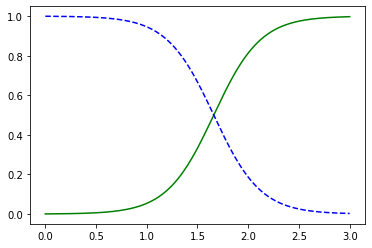

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

Because both flowers have overlapping widths, there is a **Decision boundary** at around 1.6cm where both probabilities are equal to 50%  

Sci-kit learn works with two penalty values l1 and l2, where l2 is present by default

## Example 2 - Diabetes prediction 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv", header=None, names=col_names)
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols]
y = pima.label
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
y_train.value_counts()

0          381
1          194
Outcome      1
Name: label, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

ValueError: ignored

bibliography
https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python